In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. Model Capacity

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)
Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [5]:
Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,155.5
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,155.5
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,155.5
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,155.5
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,208.4


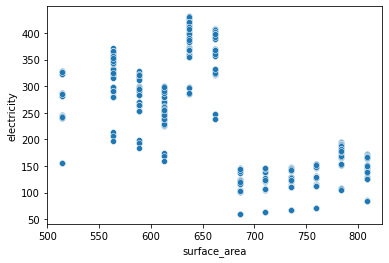

In [7]:
sns.scatterplot(Elec['surface_area'], Elec['electricity'])
plt.show()

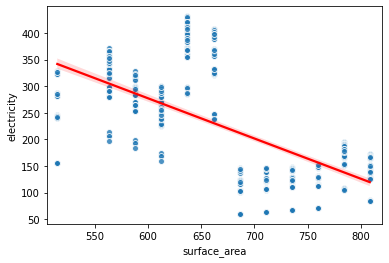

In [8]:
sns.regplot(x='surface_area', y='electricity', data= Elec,
            line_kws={'color':'red'},
            scatter_kws={'edgecolor':'white'})
plt.xlim(505, 820)
plt.show()

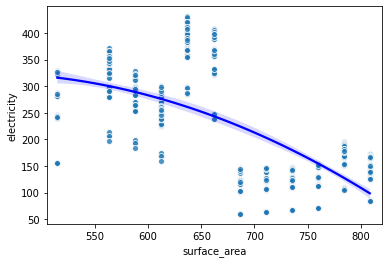

In [10]:
sns.regplot(x='surface_area', y='electricity', data= Elec,
            line_kws={'color':'red'},
            scatter_kws={'edgecolor':'white'})
plt.xlim(505, 820)
plt.show()

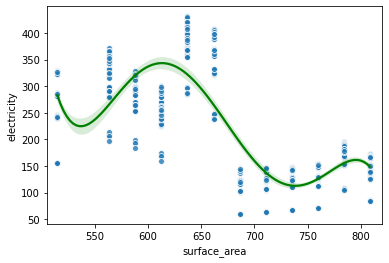

In [11]:
sns.regplot(x='surface_area', y='electricity', data= Elec,
            line_kws={'color':'green'},
            scatter_kws={'edgecolor':'white'},
            order=5)
plt.xlim(505, 820)
plt.show()

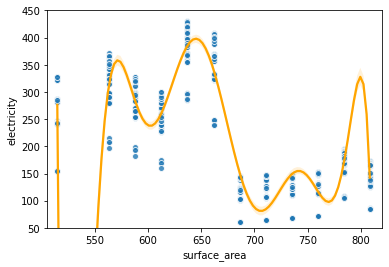

In [14]:
sns.regplot(x='surface_area', y='electricity', data= Elec,
            line_kws={'color':'orange'},
            scatter_kws={'edgecolor':'white'},
            order=9)
plt.xlim(505, 820)
plt.ylim(50, 450)
plt.show()

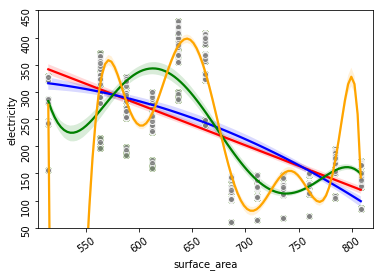

In [17]:
sns.regplot(x='surface_area', y='electricity', data= Elec,
            line_kws={'color':'red'},
            )
sns.regplot(x='surface_area', y='electricity', data= Elec,
            line_kws={'color':'blue'},
            order=2)
sns.regplot(x='surface_area', y='electricity', data= Elec,
            line_kws={'color':'green'},
            order=5)
sns.regplot(x='surface_area', y='electricity', data= Elec,
            line_kws={'color':'orange'},
            scatter_kws={'color':'gray', 'edgecolor':'white'},
            order=9)
plt.xlim(505, 820)
plt.ylim(50, 450)
plt.xticks(rotation=35)
plt.yticks(rotation=90)
plt.show()

In [18]:
# 2. Training Error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'
Elec = pd.read_csv(url)
Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [23]:
X_train = Elec[['surface_area']]
y_train = Elec['electricity']

X_train.shape, y_train.shape

((768, 1), (768,))

In [25]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print(Model_1.coef_)
print(Model_1.intercept_)

[-0.75387157]
729.4538243006992


In [28]:
y_hat_1 = Model_1.predict(X_train)
len(y_hat_1)

768

In [31]:
TR_Err_1 = np.mean((y_train - y_hat_1) ** 2)
TR_Err_1

5763.983779426347

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5, include_bias=False)
PX_5 = poly.fit_transform(X_train)
PX_5

array([[5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       ...,
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14]])

In [33]:
X_train.shape, PX_5.shape

((768, 1), (768, 5))

In [34]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
np.set_printoptions(suppress=True, precision=10)

print(Model_5.coef_)
print(Model_5.intercept_)

[-0.0003155148 -0.1029296835  0.0003787616 -0.0000005032  0.0000000002]
2906.221625380881


In [37]:
PX_5_pred = poly.fit_transform(X_train)

y_hat_5 = Model_5.predict(PX_5_pred)

y_hat_5.shape

(768,)

In [38]:
TR_Err_5 = np.mean((y_train - y_hat_5) ** 2)
TR_Err_5

4177.726328606075

In [39]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=9, include_bias=False)
PX_9 = poly.fit_transform(X_train)

In [40]:
X_train.shape, PX_9.shape

((768, 1), (768, 9))

In [41]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
print(Model_9.coef_)
print(Model_9.intercept_)

[ 0.  0.  0.  0.  0.  0. -0.  0. -0.]
-440.08258373871365


In [44]:
PX_9_pred = poly.fit_transform(X_train)

y_hat_9 = Model_9.predict(PX_9_pred)

y_hat_9.shape

(768,)

In [45]:
TR_Err_9 = np.mean((y_train - y_hat_9) ** 2)
TR_Err_9

4086.7199908150374

In [47]:
print('1차 모델 :', TR_Err_1)
print('5차 모델 :', TR_Err_5)
print('9차 모델 :', TR_Err_9)

1차 모델 : 5763.983779426347
5차 모델 : 4177.726328606075
9차 모델 : 4086.7199908150374


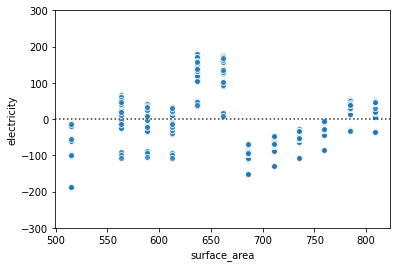

In [49]:
sns.residplot(x='surface_area',
              y='electricity',
              data=Elec,
              order=1,
              scatter_kws={'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()

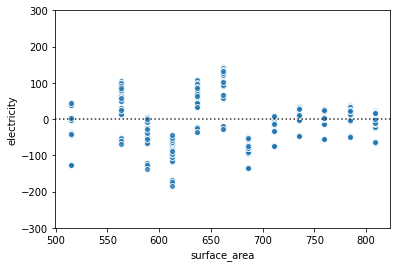

In [52]:
sns.residplot(x='surface_area',
              y='electricity',
              data=Elec,
              order=5,
              scatter_kws={'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()

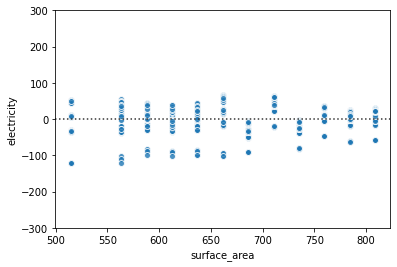

In [53]:
sns.residplot(x='surface_area',
              y='electricity',
              data=Elec,
              order=9,
              scatter_kws={'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()

In [54]:
# 3. Testing Error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'
Elec = pd.read_csv(url)
Elec.shape

(768, 9)

In [56]:
from sklearn.model_selection import train_test_split
TR_Elec, TE_Elec = train_test_split(Elec, test_size=0.2,
                                    random_state=2045)

In [57]:
TR_Elec.shape, TE_Elec.shape

((614, 9), (154, 9))

In [58]:
TR_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
555,0.74,686.0,245.0,220.5,3.5,5,0.40,1,145.5
355,0.79,637.0,343.0,147.0,7.0,5,0.25,2,389.8
200,0.86,588.0,294.0,147.0,7.0,2,0.10,4,264.4
669,0.62,808.5,367.5,220.5,3.5,3,0.40,3,163.5
561,0.69,735.0,294.0,220.5,3.5,3,0.40,1,147.0


In [59]:
TE_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
414,0.71,710.5,269.5,220.50,3.5,4,0.25,3,121.0
475,0.64,784.0,343.0,220.50,3.5,5,0.25,4,166.2
511,0.71,710.5,269.5,220.50,3.5,5,0.25,5,122.7
213,0.76,661.5,416.5,122.50,7.0,3,0.10,4,323.8
339,0.98,514.5,294.0,110.25,7.0,5,0.25,2,286.0


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Elec[['surface_area']],
                                                    Elec['electricity'],
                                                    test_size=0.2,
                                                    random_state=2045)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 1), (614,), (154, 1), (154,))

In [61]:
X_train.head()

,surface_area
555,686.0
355,637.0
200,588.0
669,808.5
561,735.0


In [62]:
y_train.head()

555    145.5
355    389.8
200    264.4
669    163.5
561    147.0
Name: electricity, dtype: float64

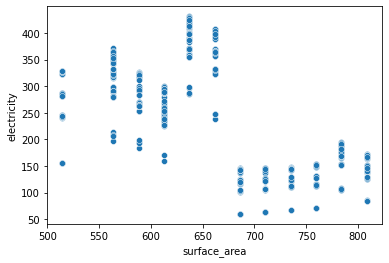

In [63]:
sns.scatterplot(TR_Elec['surface_area'], TR_Elec['electricity'])
plt.show()

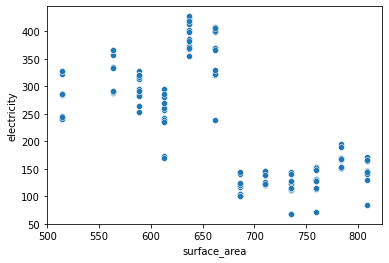

In [64]:
sns.scatterplot(TE_Elec['surface_area'], TE_Elec['electricity'])
plt.show()

In [65]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
y_hat_1 = Model_1.predict(X_test)

y_hat_1.shape

(154,)

In [67]:
from sklearn.metrics import mean_squared_error

TE_Err_1 = mean_squared_error(y_test, y_hat_1)
TE_Err_1

6044.176547629271

In [68]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5, include_bias=False)
PX_5_TR = poly.fit_transform(X_train)

In [69]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
PX_5_TE = poly.fit_transform(X_test)

y_hat_5 = Model_5.predict(PX_5_TE)

In [73]:
from sklearn.metrics import mean_squared_error

TE_Err_5 = mean_squared_error(y_test, y_hat_5)
TE_Err_5

4330.604566409499

In [74]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=9, include_bias=False)
PX_9_TR = poly.fit_transform(X_train)

In [75]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
PX_9_TE = poly.fit_transform(X_test)
y_hat_9 = Model_9.predict(PX_9_TE)

In [77]:
from sklearn.metrics import mean_squared_error

TE_Err_9 = mean_squared_error(y_test, y_hat_9)
TE_Err_9

4238.689067137633

In [78]:
print('1차 모델 :', TE_Err_1)
print('5차 모델 :', TE_Err_5)
print('9차 모델 :', TE_Err_9)

1차 모델 : 6044.176547629271
5차 모델 : 4330.604566409499
9차 모델 : 4238.689067137633


In [80]:
# 4. Validation Approach

import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [82]:
from sklearn.model_selection import train_test_split

X_remain, X_test, y_remain, y_test = train_test_split(Elec[['surface_area']],
                                                      Elec['electricity'],
                                                      test_size=int(len(Elec) * 0.2),
                                                      random_state=2045)
print(X_remain.shape, y_remain.shape)
print(X_test.shape, y_test.shape)

(615, 1) (615,)
(153, 1) (153,)


In [83]:
X_train, X_valid, y_train, y_valid = train_test_split(X_remain, y_remain,
                                                      test_size= int(len(Elec) * 0.2),
                                                      random_state=2045)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(462, 1) (462,)
(153, 1) (153,)
(153, 1) (153,)


In [84]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False)
PX_5_TR = poly.fit_transform(X_train)

In [85]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
PX_5_VD = poly.fit_transform(X_valid)
y_hat_5 = Model_5.predict(PX_5_VD)

In [87]:
from sklearn.metrics import mean_squared_error

MSE_5 = mean_squared_error(y_valid, y_hat_5)
MSE_5

4136.4312593408395

In [88]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=9, include_bias=False)
PX_9_TR = poly.fit_transform(X_train)

In [89]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
PX_9_VD = poly.fit_transform(X_valid)
y_hat_9 = Model_9.predict(PX_9_VD)

In [91]:
MSE_9 = mean_squared_error(y_valid, y_hat_9)
MSE_9

3955.9733124909912

In [92]:
print('5차 모델 MSE_5 :', MSE_5)
print('9차 모델 MSE_9 :', MSE_9)

5차 모델 MSE_5 : 4136.4312593408395
9차 모델 MSE_9 : 3955.9733124909912


In [93]:
PX_9_TE = poly.fit_transform(X_test)
mean_squared_error(y_test, Model_9.predict(PX_9_TE))

4220.88573210769